#  TASK 1 - COUNTS
***

**October 5th, 2020:** 

Objective:

Write a Python function called **counts** that takes a list as an input and returns a dictionary with the unique items of the input list as keys of the dictionary with the number of times each item appears as values. 

Example:

`Input list = ['A', 'A', 'B', 'C', 'A']`

`Output Dictonary = {'A': 3, 'B': 1, 'C': 1}`

<img src="https://github.com/PaulSweeney89/FDA-Tasks/blob/main/Images/Count%20von%20Count.jpeg?raw=true" width="250"/>

***

In [1]:
# Import Libraries to use within Jupyter Notebook.

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

## 1.1 Test Code

Initial testing of various lines of code as a means to experiement & develop the main program function.

In [2]:
# Initiate with a list constisting of a number of various strings - see note 1 below
l = ['A', 'A', 'B', 'C', 'A']

Lists in code blocks below commented out, remove comment # in order to check list with for loop below.

In [3]:
# try with a list including various strings, intergers & floating numbers - see note 2 below
# l= ['$', 5, -5, '$', 'Test', 'Test', -5, 0.35, 0.35,] 

In [4]:
# list to be nestled with a list - see note 4 below
# l1 = ['???','???', 'nestled']

In [5]:
# a list nestled within the list - see note 4 below
# l = ['F', '7', l1]
# print(l)
# print(type(l[0]))
# print(type(l[1]))
# print(type(l[2]))

In [6]:
# Provide a empty dictionary to be populated with the values of the list
d = {}

In [7]:
for value in range(0, len(l)):        # loop through all the values within in the input list                                     
    x = l[value]                      # define x as a value in the list   
                                                                               
    if x in d:                         # if the list value (x) from the list is a key in the dictionary (d)
        d[x] += 1                      # add 1 to the key value in the dictionary 
      
    else:                              # else add the list value (x) as a key with value = 1         
        d[x] = 1
print(d)

{'A': 3, 'B': 1, 'C': 1}


**Note 1:** The above test code succesfully takes the string values from the input list and outputs as a dictionary and counts the number of times each string value appear in the list.

**Note 2:** After success with testing a list containing only string type values, the code was re-run with a second list containing strings, intergers & floating numbers. The test code also worked in this instance. 

**Note 3:** The jupyter notebook line order number (In) will determine which of the input lists will be used into the test code.

**Note 4:** The test code does not works when the input list contains a nested list with, i.e list `l1`. 

Looking at the data types within the list it can been seen that the nested list `l1` remains as a 'list' type and therefore is not compatiable with the dictionary & counting approach developed.     

##  1.2 Nested List Within a List - 'Flatten the List'

In the below code I have made an hatchet attempt to 'flatten' out a list that contains within it another list or a nested list to possibly resolve the issue highlighted above in note 4.

The nested list was identifed by looking at the element types within the list using the **isinstance()** function [1],[2] 

The **list.pop()** function was used to remove the nested list from the main list [3]

The nested list was then merged with the main list [4], the final merged list then therefore only contained intergers, strings or floats.

This attempt at 'flattening out' a list containing a nested list seems quite cumbersome and not a very efficent means to extract and re-merge a nested list, so I did not develop this means any further.

In [8]:
l2 = [5, 5.5, 5]
l3 = [6, 'A', l2]

for val in range(0, len(l3)):
    y = l3[val]
    
    if isinstance(y, list):
        lremove = l3.pop(val)
        lmerge = l3 + y
        
print(lmerge)
    
for val in range(0, len(lmerge)):
    print(type(lmerge[val]))

[6, 'A', 5, 5.5, 5]
<class 'int'>
<class 'str'>
<class 'int'>
<class 'float'>
<class 'int'>


## 1.3 Nested Lists - Continued

Following on from the above attempt at 'flattening the list', I came across the below function taken  directly from an article at thispointer.com [6] which makes use of the **list.extend()** and **list.append()** functions to effectively 'flatten' nested lists within a list.

This is a much more efficent & simplier approach to use, rather than attempting to use the **list.pop()** and list merge functions I had attempted in the above code.

In [9]:
def flattenNestedList(nestedList):
    ''' Converts a nested list to a flat list
        thispointer.com
    '''
    
    flatList = []
    # Iterate over all the elements in given list
    for elem in nestedList:
        # Check if type of element is list
        if isinstance(elem, list):
            # Extend the flat list by adding contents of this element (list)
            flatList.extend(flattenNestedList(elem))
            
        # Additional check if type of element is tuple (not in original code from thispointer.com)    
        elif isinstance(elem, tuple):
            # change tuple type to list type
            tuple2list = list(elem)
            # merge back into list
            flatList = flatList + tuple2list
            
        else:
            # Append the elemengt to the list
            flatList.append(elem)    
    return flatList

In [10]:
# list to check the above function
l4 = ['a', 'a', [2,2]]
flattenNestedList(l4)

['a', 'a', 2, 2]

In [11]:
# list to check above function containing a tuple
l5 = ['a', 'a', (2,2)]
print(flattenNestedList(l5))

['a', 'a', 2, 2]


**Note:** the original function taken from thispointer.com [6] above did not include the means to check & merge a tuple contained within the list, i.e list `l5`

However by including the addition **elif** statement into the function definition above, the list will also be checked for containing any tuples and the tuples are easily converted to a list and re-merged back into the list.
```
        elif isinstance(elem, tuple):
            tuple2list = list(elem)
            flatList = flatList + tuple2list
```

## 1.4 Counts Function

Using the code & function developed above and defining it as the **counts** function, to complete the objective of the task.

In [12]:
def counts(l):
    """
    function counts the number of values in a input list 
    and returns the result as a dictionary
    """    
    d = {}
    
    # incorporting the flattenNestedlist() function. 
    l = flattenNestedList(l)
    
    for value in range(0, len(l)):
        x = l[value]
        if x in d:
            d[x] += 1
        else:
            d[x] = 1
    return(d)

In [13]:
# a list containing strings, intergers, floats, nested lists & tuples.
l6 = ['A', 'A', 'B', 'c', 1, 2 , 3.5, ['A', 'A'], [2, 2], ('D', 'D'), (3.5, 3.5)]
counts(l6)

{'A': 4, 'B': 1, 'c': 1, 1: 1, 2: 3, 3.5: 3, 'D': 2}

In [14]:
# a list containing nested tuple within a nested list
l7 = ['A', ['A', ('B', 'B')]]
counts(l7)

{'A': 2, 'B': 2}

## 1.5 Conclusion

The ***counts()*** function developed is capable of taking in a list containing strings, intergers, floats and outputing the list as a dictionary, counting the number of times the value occurs within the list.

By incorporting the the **flattenNestedList()**, the **counts()** function will also work when a list contains, nested lists or tuples.  

One item of significance I gained from undetaking this task is the importance of naming conventions for variables. initially in the test code I used the name 'list' as the variable for the input list. 
I later found this to cause issues when looking at boolean statements for data types, i.e `if type(x) == list`. 
I then changed the variable name from 'list' to 'l' to avoid this issue, while jupyter had highlighted this by changing the colour of the named variable 'list', but at the time I did not give any thoughts to the significance of this.  

## 1.6 References for Task 1:

[1] Python|type() function, [geeksforgeeks.org](https://www.geeksforgeeks.org/python-type-function/)

[2] Checking if type == list, [Stackoverflow.com](https://stackoverflow.com/a/26544117) 

[3] Python List pop function, [programiz.com](https://www.programiz.com/python-programming/methods/list/pop) 

[4] Merging Lists, [thispointer.com](https://www.programiz.com/python-programming/methods/list/pop) 

[5] 10 ways to convert lists to dictionaries, [medium.com](https://medium.com/better-programming/10-ways-to-convert-lists-to-dictionaries-in-python-d2c728d2aeb8)

[6] Convert list of lists, [thispointer.com](https://thispointer.com/python-convert-list-of-lists-or-nested-list-to-flat-list/)
    
- - -

<br>

#  TASK 2 - DiceRolls
***

**November 2nd, 2020:** 

Objective:

Write a Python function called **dicerolls** that simulates rolling dice. The function should take two parameters: the number of dice $k$ and the number of times to roll the dice $n$. The function should simulate randomly rolling $k$ dice $n$ times, keeping track of each total face value. It should then return a dictionary with the number of times each possible total face value occurred.

Example:

`diceroll(k=2, n=1000)`

`output dictionary = {2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}`

<img src="https://github.com/PaulSweeney89/FDA-Tasks/blob/main/Images/Dice.png?raw=true" width="250"/>

***

## 2.1 Test Code

Initial testing of various lines of code as a means to experiement & develop the main program function.

In [15]:
# Generate random number between 1 & 6 to simulate a roll of a dice
ran = random.randint(1,6)
print(ran)

2


Using the python random module to generate a random interger number from 1 to 6, replicating the roll of a dice.

In [16]:
# Generate a single random number for n number of rolls
n = 5
l = [] 
for i in range(0,n):
    l.append(random.randint(1,6))
        
print(l)

[2, 5, 4, 6, 3]


Using a for loop to generate a random number for n number of rolls, the random numbers generated is outputted as a list.

In [17]:
# Generate a random number for k number of diced rolled 
k = 2
d = []
for x in range(0,k):
    d.append(random.randint(1,6))

print(d)
print(sum(d))

[4, 3]
7


Using a second for loop to generate k number of random numbers, the sum of the value of random numbers is calculated replicating the roll of one or more dice at a time.

## 2.2 Dicerolls Function

Using the methods from above to define the functions that will fully replicate the roll of a number of dice k, with a fixed number of rolls n.   

<a id='2.2-Dicerolls-Function'></a>

In [18]:
def single_roll(k):
    """
    Function to replicate a single roll of k number of dice.
    """ 
    d = []
    for x in range(0,k):
        d.append(random.randint(1,6))
    #print(d)
    
    return(sum(d))

In [19]:
single_roll(2)

7

In [20]:
def dicerolls(k, n):
    """
    Function to replicate a number of rolls n of k number of dice.
    """ 
    l = []
    
    for i in range(0,n):
        l.append(single_roll(k))            # using the single_roll function.
    
    dice_roll = counts(l)                   # count function taken from task 1.
    #print(l)
    return dice_roll

In [21]:
# rolling 2 dice (k=2) 1000 times (n=1000.
x = dicerolls(2, 1000)
print("Dice Roll Results = ", x)

Dice Roll Results =  {2: 30, 4: 82, 6: 169, 3: 58, 7: 164, 8: 125, 5: 99, 9: 127, 10: 67, 12: 27, 11: 52}


## 2.3 Visualize Dicerolls

To visualize the results from rolling the 2 dice above 1000 times, a Seaborn bar chart was created.

The results were compiled into a pandas DataFrame structure, where the column names 'Sum of Dice' & 'Count' were added. The DataFrame values were then sorted by the 'Sum of Dice' values in ascending order providing a useful table to accompany the Seaborn bar chart plot.

    Sum of Dice  Count
0             2     30
3             3     58
1             4     82
6             5     99
2             6    169
4             7    164
5             8    125
7             9    127
8            10     67
10           11     52
9            12     27


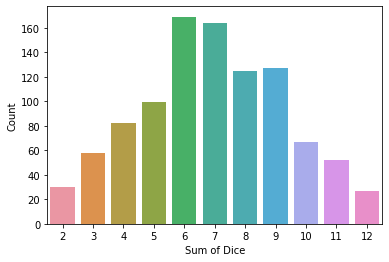

In [22]:
# taking dictionary x & output key & values as separate lists, sum_dice & count. 
sum_dice = list(x.keys())
count = list(x.values())

y = {"Sum of Dice" : sum_dice, "Count" : count}
df =pd.DataFrame(y)
print(df.sort_values(by="Sum of Dice"))

sns.barplot(x = "Sum of Dice", y = "Count", data = df);

From the Pandas DataFrame & Seaborn bar plot above, the distribution shape of the sum of the dice values (k no. dice) for n number of rolls is very distinctive. 

The distribution mostly peaks at the sum value of 7 and then tapers off to the values at either end i.e minimum dice sum value = 2 (rolling 2no. 1's) & maximum sum value = 12 (rolling 2no. 6's)

The shape of the distribution is the due to the probabilities of rolling one than more dice, e.g it is more likely when using 2 dice to roll a 7 rather than a 2 or a 12. as there are 6 ways (permutations) to achieve a 7 using 2 dice i.e (1 & 6), (2 & 5), (3 & 4), (4 & 3), (5 & 2), (6 & 1).

When rolling 2 dice there are a total of 36 combinations or permutationsfor achieving the range of values from 2 up to 12, therefore the probability of rolling a particular value can be calculated using the following formula.

$$Probability = \frac {Number \space of \space possible \space outcomes}
{Number \space of \space desired \space outcomes}\hspace{1cm}(1)$$

Probability of rolling a 7 - 16.667%

$$\frac{6}{36} = 0.16667$$

Probability of rolling a 2 - 2.778%

$$\frac{1}{36} = 0.02778$$

Increasing the number of dice rolled & increasing the number of times the dice are rolled accentuates the bell curve distribution shape, as it increases the range of the dice sum values (2 dice range from 2 to 12, 3 dice range from 3 to 18, 4 dice range from 4 to 24 etc). As shown below the shape of the distribution approximates a normal distribution.

If you roll only 1 dice a 1000 times you will find a uniform distribution between the dice values i.e the probability of rolling a 1 or a 6 on a single dice is the same (2.778%), as shown below.

| One Dice / Rolled 1000x (Uniform Distribution) | Five Dice / Rolled 10000x (Normal Distribution)|
|-------------------------|---------------------------|
|![one dice](https://github.com/PaulSweeney89/FDA-Tasks/blob/main/Images/1%20Dice.png?raw=true)|![five dice](https://github.com/PaulSweeney89/FDA-Tasks/blob/main/Images/5%20Dice.png?raw=true)|


**Roll 2-Dice Probability Table** [3]

|ROLL A…|PROBABILITY|
|------------|----------------|
|2|1/36 (2.778%)|
|3|2/36 (5.556%)|
|4|3/36 (8.333%)|
|5|4/36 (11.111%)|
|6|5/36 (13.889%)|
|7|6/36 (16.667%)|
|8|5/36 (13.889%)|
|9|4/36 (11.111%)|
|10|3/36 (8.333%)|
|11|2/36 (5.556%)|
|12|1/36 (2.778%)|


## 2.4 References for Task 2

[1] [stackoverflow.com, Mathplotlib Bar Chart using Dictionary](https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary#answer-53432195:~:text=suggest%3A-,import%20matplotlib.pyplot%20as%20plt,plt.show())

[2] [sharpsightlabs.com, Seaborn Barplot](https://www.sharpsightlabs.com/blog/seaborn-barplot/)

[3] [statisticshowto, Dice Roll Probability](https://www.statisticshowto.com/probability-and-statistics/probability-main-index/dice-roll-probability-6-sided-dice/)

<br>

#  TASK 3 - CoinFlip
***

**November 2nd, 2020:** 

Objective:

Using jupyter notebook write some python code which simulates flipping a coin with a 50/50 chance of heads or tails a 100 times, the code should count & record the number of heads landed for each coin flip. The code should then repeat this process 1000 times, using an appropriate plot the results of the coin flips should be depicted. It should be shown that the distribution of recorded heads landed for the coin fills will follow a bell-shaped curve. 

<img src="https://github.com/PaulSweeney89/FDA-Tasks/blob/main/Images/Coinflip.png?raw=true" width="250"/>

***

## 3.1 CoinFlip Function

The workings of DiceRolls function in Section 2.2 is very similar to the requirements for this task.
Therefore the same approach can be taken to develop a function that simulates 100 coin flips repeated a 1000 times.

In [23]:
# Define function CF, repeated 'n' number of times
def CF(n):
    """
    Function to replicate a coin flip, with n number of flips.
    """ 
    list_CF = []
    for x in range(0, n):
        list_CF.append(random.randint(0, 1))
    return list_CF

In [24]:
# CF function to simulate 100 number coin flips
cf = CF(100)
print("Results of CF = ", cf, "\n")
print("Sum of heads = ", sum(cf))

Results of CF =  [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1] 

Sum of heads =  48


The CF function produces at random a 0 or a 1, where 1 equals a coin flip landing on heads & 0 equals a tails. The results of each of the n number of coin flips is recorded as a list, by counting up the number of 1 generated it will equivalent of counting the number of heads flipped.

In [25]:
# Define function CoinFlip to repeat CF, 's' number of times
def CoinFlip(n, s):
    """
    Function to replicate a number of coin flips, n number of flips, repeated s number of times.
    """
    list_CoinFlip = []
    for i in range(0, s):
        list_CoinFlip.append(sum(CF(n)))                    # using the sum of CF function to count number of heads flipped.
        count_heads = counts(list_CoinFlip)                 # count function taken from task 1.
    return count_heads

In [26]:
# CoinFlip function to simulate 100 number coin flips repeated 1000 times
heads = CoinFlip(100, 1000)

The CoinFlip function counts the number of heads achieved from the CF function, repeats this process for 's' number of times & outputs the results as a dictionary using the counts function developed in task 1.

## 3.2 Visualize CoinFlips

To visualize the results from flipping a coin 100 times & then repeated 1000 times, a Seaborn bar chart was created.

The results were compiled into a pandas DataFrame structure, where the column names 'No. of Heads Flipped' & 'Count' were added. The DataFrame values were then sorted by the 'No. of Heads Flipped' values in ascending order providing a useful table to accompany the Seaborn bar chart plot.

    No. of Heads Flipped  Count
27                    34      1
30                    35      1
29                    37      1
24                    38      4
15                    39     13
13                    40     12
5                     41     26
17                    42     28
14                    43     34
12                    44     26
21                    45     37
1                     46     56
16                    47     53
8                     48     80
9                     49     72
19                    50     77
6                     51     66
18                    52     65
4                     53     71
3                     54     68
20                    55     44
10                    56     47
11                    57     36
22                    58     28
2                     59     24
7                     60     11
23                    61      3
26                    62      5
0                     63      7
25                    64      1
28      

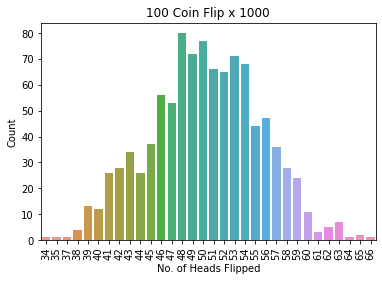

In [27]:
# taking dictionary 'heads' & output key & values as separate lists, heads_sum & heads_count. 
heads_sum = list(heads.keys())
heads_count = list(heads.values())

# create a pandas DataFrame of the results of the CoinFlip Function
total_heads = {"No. of Heads Flipped" : heads_sum, "Count" : heads_count}
df_heads =pd.DataFrame(total_heads)
print(df_heads.sort_values(by="No. of Heads Flipped"))

plt.xticks(rotation=90)
plt.title("100 Coin Flip x 1000")
sns.barplot(x = "No. of Heads Flipped", y = "Count", data = df_heads);

From the seaborn bar plot & dataframe table above, the results of flipping a coin 100 times & repeating this process 1000 times can be seen. 

By recording & plotting the number of heads flipped per each 100 coin flips, the distribution of values is shown to follow a distinctive bell curve shape.

The distribution plot & output results show that the peak of the distribution is centred approximately around the mean value of 50 heads out of 100, as is expected as each flip of the coin flip has the same probability (50%) of coming up heads or tails. 

The distribution then tapers off to either side to the lower values of range 35 to 38 & to the higher values of range 62 to 65. This shape of the distribution indicates that there is a higher probability of obtaining values within the range of 45 to 55, compared to the other values when carrying out this coin flip exercise.

The above coin flip distribution follows what is know as a binomial distribution which can be described using the following probability function.

$$ Pr(X) =\left(n \atop k\right) p^{k} (1−p)^{n−k} \hspace{1cm}(1)$$

$$\left(n \atop k\right) = \frac {n!}{k!(n-k)!} \hspace{1cm}(2)$$

The probability Pr(X) of getting exactly k successes in n independent trials, where p = probability of success on an individual trial. 

Note that function 2 is used to calculate the number of permutations available for the inputted values e.g the number of ways to get n heads in k flips.

## 3.3 Binomial Probability Function

Using the binomial probability function to plot the probability distribution for a 100 coin flips.

In [28]:
def perm(n, k):
    ''' Permutation formula for 'n' heads in 'k' flips'''
    n_fac = math.factorial(n)
    k_fac = math.factorial(k)
    n_k_fac = math.factorial(n-k)
    
    nk = n_fac / (k_fac * n_k_fac)
    
    return nk

In [29]:
def Pr(k, n, p):
    ''' Binomial distribution formula'''
    
    # calculate permutation formula
    nk = perm(n, k)
    
    # calculate binomial 
    pr = nk*(p**k)*(1-p)**(n-k)
    
    return pr

**Example:**

Using a unbiased coin with a probability of p = 0.5 when tossed. 

1. Calculate the probability of seeing exactly k = 50 heads in n = 100 tosses.

2. Calculate the probability of seeing exactly k = 36 heads in n = 100 tosses.

In [30]:
# Calculate probability of example above
print("Probability - 50 heads = ", round(Pr(50, 100, 0.5) * 100, 2), "%")
print("Probability - 36 heads = ", round(Pr(36, 100, 0.5) * 100, 2), "%")

Probability - 50 heads =  7.96 %
Probability - 36 heads =  0.16 %


Plotting the probability distribution of the number of heads landed for flipping a coin 100 times.

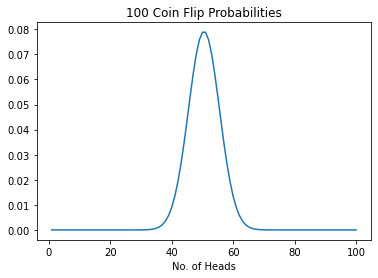

In [31]:
p_list = []
for i in range(1, 101):
    prob = Pr(i, 101, 0.5)
    p_list.append(prob)

xplot = np.arange(1, 101)

plt.title("100 Coin Flip Probabilities")
plt.xlabel("No. of Heads")
sns.lineplot(x=xplot, y=p_list);

It can be seen that the results from section 3.2 clearly follow the binomial probability distribution plot shown above. The peak of the distribution occurs at 50 and the shape tapers off at either end, approx 35 min end & 65 max end. It can be seen that outside this range of values (35 - 65) the distribution reaches almost 0, i.e the probability of achieving 1 heads or 80 heads out of 100 is practically 0.

## 3.4 NumPy Binomial Distribution

The NumPy python package has a built-in function for generating random values that will follow a binomial distribution shape. This function can also be used  to simulate the coin flip exercise & to provide very similar results.

    No. of Heads Flipped  Count
24                    34      2
26                    35      1
27                    36      2
21                    37      4
28                    38      1
31                    39      7
19                    40     13
0                     41     14
2                     42     20
10                    43     35
12                    44     43
4                     45     65
11                    46     51
5                     47     64
15                    48     83
9                     49     71
16                    50     95
14                    51     75
1                     52     60
3                     53     77
17                    54     55
7                     55     39
8                     56     41
13                    57     28
6                     58     21
22                    59     11
25                    60      7
20                    61      6
18                    62      5
29                    63      2
23      

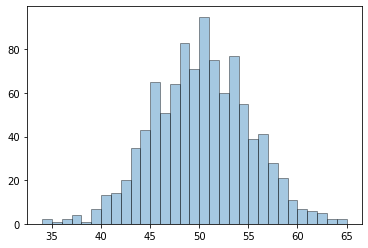

In [32]:
# Using NumPy's binomial distribution to simulate 100 fair sided coin tosses & repeated 1000 times. 
import numpy as np

coin_flip = np.random.binomial(n=100, p=0.5, size=1000)

# create dictonary of binomial distribution results
bin_cf = counts(coin_flip.tolist())

# taking dictionary & output key & values as separate lists
bin_sum = list(bin_cf.keys())
bin_count = list(bin_cf.values())

# create a pandas DataFrame of the results of the binomial distribution
total_heads_bin = {"No. of Heads Flipped" : bin_sum, "Count" : bin_count}
df_heads_bin =pd.DataFrame(total_heads_bin)
print(df_heads_bin.sort_values(by="No. of Heads Flipped"))

# calc no. of bins for plot in order to display full distribution shape
no_bins = max(df_heads_bin["No. of Heads Flipped"])- min(df_heads_bin["No. of Heads Flipped"])

sns.distplot(coin_flip, kde=False, bins=no_bins, hist_kws=dict(edgecolor="black", linewidth=1));

It can be seen that the distribution shape is very similar to that of section 3.2, with the peak of the distribution occuring around 50 and tapering off at each end.

## 3.5 References for Task 3

[1] [fourmilab.ch, Probability and Statistics](https://www.fourmilab.ch/rpkp/experiments/statistics.html)

[2] [investopedia.com, Binomial Distribution](https://www.investopedia.com/terms/b/binomialdistribution.asp)

[3] [wikipedia.org, Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

[4] [github.com, PaulSweeney, Section 3.5 NumPy Binomial Distribution](https://github.com/PaulSweeney89/ProgDA-Task/blob/main/NumPy.ipynb)

<br>

#  TASK 4 - Simpson’s Paradox
***

**November 30th, 2020:** 

Objective:

Use numpy to create four data sets, each with an **x** array and a corresponding **y** array, to demonstrate Simpson’s paradox.

<img src="https://github.com/PaulSweeney89/FDA-Tasks/blob/main/Images/Simpson's%20Paradox.PNG?raw=true" />

Simpson’s Paradox occurs when trends appear to occur in in several different groups of data when the dataset is separated, however when the groups of data are combined or aggregated the trends reverse.

In the image above, it can be seen that when looking at the blue & red data separately the slope of the line or trend of the data is negative i.e  the **x** & **y** variables are negatively related. However when the datapoints are combined the trend of the data changes direction and there is now a positive relationship between the **x** & **y** variables.

Simpson's paradox can occur as a real world statistical phenomenon, it illustrates how statistical results can be easily misinterpreted and can often lead to incorrect conclusions about particular data. 

## 4.1 Generating the Dataset

To demonstrate Simpon's Paradox, four groups of data are created below. 

The four groups of data each consists of two variables, x & y values which will represent the x-coordinates & y-coordinates on a plot. The groups of data will contain 20 data points in total each.

x values are generated using NumPy's linspace function to generate an array of 20 values within the given range.

y values are generated using the linear equation for two variables, using the below formula.

$$ y = ax + b $$

x = x-coordinate

y = y-coordinate

a = slope of line or regression coefficient

b = intercept (y value when x value = 0) or constant

To produce data that doesn't appear 'too linear', some random noise was introduced to the y values by using NumPy's random normal distribution function.

In [292]:
# Group 1 Data - (x1, y1)

# a & b values for calculating y, y = ax + b
a, b = -0.5, 1.4

x1 = np.linspace(start=0.5, stop=1.5, num=20)

# add random noise to data to make it appear less linear.
noise = np.random.normal(0, 0.1, x1.shape) 

y1 = a * x1 + b
y1 = y1 + noise

In [293]:
# Group 2 Data - (x2, y2)

# a & b values for calculating y, y = ax + b
a, b = -0.75, 2.25

x2 = np.linspace(1, 2, 20)

# add random noise to data to make it appear less linear.
noise = np.random.normal(-0.1, 0.1, x2.shape)

y2 = a * x2 + b
y2 = y2 + noise

In [319]:
# Group 3 Data  - (x3, y3)

# a & b values for calculating y, y = ax + b
a, b = -0.6, 3

x3 = np.linspace(2, 3, 20)

# add random noise to data to make it appear less linear.
noise = np.random.normal(-0.1, 0.1, x3.shape)

y3 = a * x3 + b
y3 = y3 + noise

In [332]:
# Group 4 Data - (x4, y4)

# a & b values for calculating y, y = ax + b
a, b = -0.5, 3.1

x4 = np.linspace(2, 3, 20)

# add random noise to data to make it appear less linear.
noise = np.random.normal(-0.1, 0.1, x4.shape)

y4 = a * x4 + b
y4 = y4 + noise

In [333]:
# Combine the four data groups together.

x_array = np.concatenate((x1, x2, x3, x4))
y_array = np.concatenate((y1, y2, y3, y4))

# compile data into a pandas DataFrame, for ease of reviewing values.
d = {'x' : x_array, 'y' : y_array}
df = pd.DataFrame(d)

## 4.2 Full Dataset Regression Line

Using the full dataset produced, fit a best fit line or regression line to the dataset. 

The regression line for the full dataset was determined using NumPy's polyfit function, which uses the least square method to calculate the slope & intercept of the best fit line for the dataset.

In [334]:
# Fit Regression line to data using NumPy's least squares polynomial fit

fit = np.polyfit(x_array, y_array, 1)
slope = fit[0]
intercept = fit[1]

print("Regression line of full dataset")
print("y = ", round(slope, 2), "x + ", round(intercept, 2))

Regression line of full dataset
y =  0.27 x +  0.76


In [344]:
# Generate some coorindates for plotting the regression line
x_new = np.linspace(0.5, 3, 2)
y_new = slope * x_new + intercept

## 4.3 Full Dataset Plot & Regression Line

A scatterplot was used to plot the x & y coordinates for the full data set.

The regression line was also fitted to the full dataset on this plot.

In [366]:
# Increasing the size of the output plots
plt.rcParams["figure.figsize"] = (10,7)

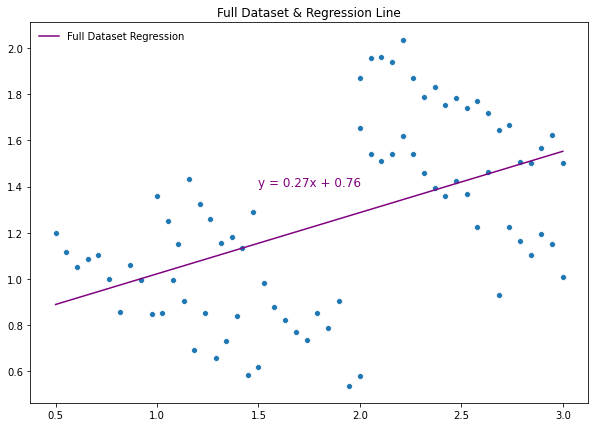

In [367]:
# scatter plot of full dataset 
sns.scatterplot(x_array, y_array)

# plot regression line
sns.lineplot(x_new, y_new, color='purple')

# include legend with regression line formula
plt.legend(["Full Dataset Regression"], frameon=False, loc="upper left")

# apply text with R^2 value to plot
plt.text(1.5, 1.4, 'y = {}x + {}'.format(round(slope, 2), round(intercept, 2)), color='purple', size=12)

plt.title("Full Dataset & Regression Line")
plt.show()

From a quick initial review of the plot above & the full dataset, it can be seen that there is a positive linear relationship between the x & y variables, i.e as the x values increase so do the y values.

The regression line equation calculated for the dataset contains a positive slope or regression coefficent, which confirms the postive trend between the x & y values.

## 4.4 A Closer Look at the Dataset

In data analytics & statistics it is essential to fully investigate all the data available along with any further information, before arriving at a final conclusions for the dataset.
Quick or casual reviews of data can quite often lead to misinterpretations of the relationships between the varaiables.

To demonstrate Simpon's Paradox within the above simulated dataset, a further look into the dataset will be taken and the relationships between the data will be appropriately addressed.

As the dataset consists of a number of different groups of data, i.e group 1 to group 4, it is important to identify & distinguish between these groups when analyzing the full dataset.

### Regression lines for the 4 individual groups of data

Fitting regression lines to each of the 4 individual groups of data, using NumPy's polyfit function.

In [338]:
# Fit Regression lines to groups of data using NumPy's least squares polynomial fit

# Group 1
fit_1 = np.polyfit(x1, y1, 1)
slope_1 = fit_1[0]
intercept_1 = fit_1[1]

print("Regression line of Group 1 Data")
print("y = ", round(slope_1, 2), "x + ", round(intercept_1, 2), "\n")

# Group 2
fit_2 = np.polyfit(x2, y2, 1)
slope_2 = fit_2[0]
intercept_2 = fit_2[1]

print("Regression line of Group 2 Data")
print("y = ", round(slope_2, 2), "x + ", round(intercept_2, 2), "\n")

# Group 3
fit_3 = np.polyfit(x3, y3, 1)
slope_3 = fit_3[0]
intercept_3 = fit_3[1]

print("Regression line of Group 3 Data")
print("y = ", round(slope_3, 2), "x + ", round(intercept_3, 2), "\n")

# Group 4
fit_4 = np.polyfit(x4, y4, 1)
slope_4 = fit_4[0]
intercept_4 = fit_4[1]

print("Regression line of Group 4 Data")
print("y = ", round(slope_4, 2), "x + ", round(intercept_4, 2))

Regression line of Group 1 Data
y =  -0.51 x +  1.42 

Regression line of Group 2 Data
y =  -0.78 x +  2.19 

Regression line of Group 3 Data
y =  -0.59 x +  2.81 

Regression line of Group 4 Data
y =  -0.48 x +  2.94


In [349]:
# Generate coorindates for plotting the regression lines

x_new_1 = np.linspace(0.5, 1.5, 2)
y_new_1 = slope_1 * x_new_1 + intercept_1

x_new_2 = np.linspace(1, 2, 2)
y_new_2 = slope_2 * x_new_2 + intercept_2

x_new_3 = np.linspace(2, 3, 2)
y_new_3 = slope_3 * x_new_3 + intercept_3

x_new_4 = np.linspace(2, 3, 2)
y_new_4 = slope_4 * x_new_4 + intercept_4

## 4.5 Grouped Data Plot  & Regression Lines

Identifying & labelling the 4 different groups of data, also fitting the regression lines to the individual groups within the plot of the full dataset.

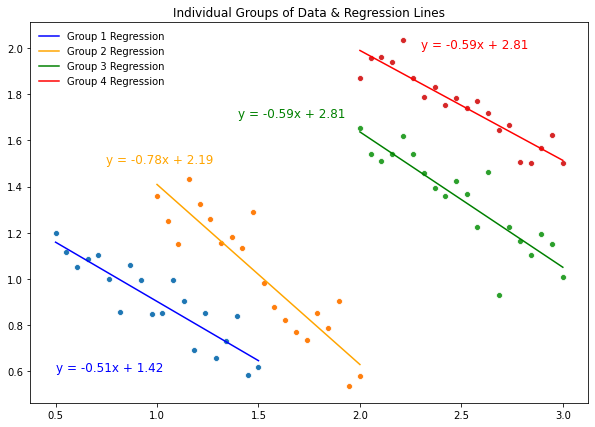

In [368]:
# scatterplot identifying 4 groups of data
sns.scatterplot(x1, y1)
sns.scatterplot(x2, y2)
sns.scatterplot(x3, y3)
sns.scatterplot(x4, y4)

# plot regression lines
sns.lineplot(x_new_1, y_new_1, color='blue')
sns.lineplot(x_new_2, y_new_2, color='orange')
sns.lineplot(x_new_3, y_new_3, color='green')
sns.lineplot(x_new_4, y_new_4, color='red')

# include legend of grouped data
plt.legend(["Group 1 Regression", "Group 2 Regression", 
            "Group 3 Regression", "Group 4 Regression"], 
           frameon=False, loc="upper left")

# apply text with R^2 values to plot
plt.text(0.5, 0.6, 'y = {}x + {}'.format(round(slope_1, 2), round(intercept_1, 2)), color='blue', size=12)
plt.text(0.75, 1.5, 'y = {}x + {}'.format(round(slope_2, 2), round(intercept_2, 2)), color='orange', size=12)
plt.text(1.4, 1.7, 'y = {}x + {}'.format(round(slope_3, 2), round(intercept_3, 2)), color='green', size=12) 
plt.text(2.3, 2.0, 'y = {}x + {}'.format(round(slope_3, 2), round(intercept_3, 2)), color='red', size=12)

plt.title("Individual Groups of Data & Regression Lines")
plt.show()

By distinguishing between the four individual groups of data and by plotting the regression lines for each group, it can be seen that the linear relationship between the variables for the groups of data is negative.  

The regression line formulas for the groups all contain negative regression coefficents or slopes which confirms the negative trends between the data variables.

## 4.6 Strength of the Relationship R-Squared

To confirm the correct linear relationship or trend between the x & y variables of the dataset, the R-squared values for the different regression lines will be calculated.

By comparing the R-squared measurements, the correct or most suitable trend of the dataset can then be identified, i.e is there a positive or negative trend between the variables. 

### Using Scikit Learn to calculate the R-Squared values

Full Dataset Regression Line R-Squared Values:

In [372]:
# Calculating the coefficient of Determination R^2 of the regression line for the full dataset. 
x_array_reshape = x_array.reshape(-1, 1)

model_full = LinearRegression().fit(x_array_reshape, y_array)

r_sq_full = model_full.score(x_array_reshape, y_array)
print("Full Dataset Regression Line:")
print("Coefficient of Determination R^2 = ", r_sq_full)

Full Dataset Regression Line:
Coefficient of Determination R^2 =  0.24207091861375196


Group 1 to Group 4 Regression Line R-Squared Values:

In [370]:
# Calculating the coefficient of Determination R^2 of the regression line for Group 1 Data. 
x1_reshape = x1.reshape(-1, 1)

model_1 = LinearRegression().fit(x1_reshape, y1)

r_sq_1 = model_1.score(x1_reshape, y1)
print("Group 1 Data Regression Line:")
print("Coefficient of Determination R^2 = ", r_sq_1, "\n")

# Calculating the coefficient of Determination R^2 of the regression line for Group 2 Data. 
x2_reshape = x2.reshape(-1, 1)

model_2 = LinearRegression().fit(x2_reshape, y2)

r_sq_2 = model_2.score(x2_reshape, y2)
print("Group 2 Data Regression Line:")
print("Coefficient of Determination R^2 = ", r_sq_2, "\n")

# Calculating the coefficient of Determination R^2 of the regression line for Group 3 Data. 
x3_reshape = x3.reshape(-1, 1)

model_3 = LinearRegression().fit(x3_reshape, y3)

r_sq_3 = model_3.score(x3_reshape, y3)
print("Group 3 Data Regression Line:")
print("Coefficient of Determination R^2 = ", r_sq_3, "\n")

# Calculating the coefficient of Determination R^2 of the regression line for Group 4 Data. 
x4_reshape = x4.reshape(-1, 1)

model_4 = LinearRegression().fit(x4_reshape, y4)

r_sq_4 = model_4.score(x4_reshape, y4)
print("Group 4 Data Regression Line:")
print("Coefficient of Determination R^2 = ", r_sq_4, "\n")

Group 1 Data Regression Line:
Coefficient of Determination R^2 =  0.7981932972344796 

Group 2 Data Regression Line:
Coefficient of Determination R^2 =  0.8205072219320284 

Group 3 Data Regression Line:
Coefficient of Determination R^2 =  0.7773276642850475 

Group 4 Data Regression Line:
Coefficient of Determination R^2 =  0.8494812275985251 



### Plotting the Results of the R-Squared Calculations

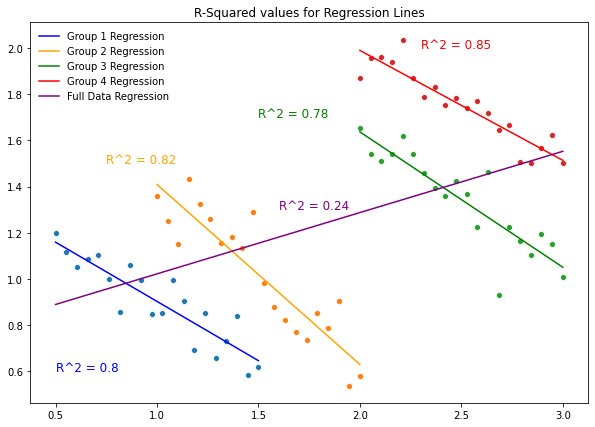

In [371]:
# scatterplot identifying 4 groups of data
sns.scatterplot(x1, y1)
sns.scatterplot(x2, y2)
sns.scatterplot(x3, y3)
sns.scatterplot(x4, y4)

# plot regression lines
sns.lineplot(x_new_1, y_new_1, color='blue')
sns.lineplot(x_new_2, y_new_2, color='orange')
sns.lineplot(x_new_3, y_new_3, color='green')
sns.lineplot(x_new_4, y_new_4, color='red')
sns.lineplot(x_new, y_new, color='purple')

# include legend of grouped data
plt.legend(["Group 1 Regression", "Group 2 Regression", 
            "Group 3 Regression", "Group 4 Regression", 
            "Full Data Regression"
           ], frameon=False, loc="upper left")

# apply text with R^2 values to plot
plt.text(0.5, 0.6, "R^2 = {}".format(round(r_sq_1, 2)), color='blue', size=12)
plt.text(0.75, 1.5, "R^2 = {}".format(round(r_sq_2, 2)), color='orange', size=12)
plt.text(1.5, 1.7, "R^2 = {}".format(round(r_sq_3, 2)), color='green', size=12)
plt.text(2.3, 2.0, "R^2 = {}".format(round(r_sq_4, 2)), color='red', size=12)
plt.text(1.6, 1.3, "R^2 = {}".format(round(r_sq_full, 2)), color='purple', size=12)

plt.title("R-Squared values for Regression Lines")
plt.show()

From the results of the R-squared calculations it can be seen that the regression lines for the individual groups have a higher R-squared or correlation value compared to the regression line of the full dataset. 

This confirms that there is a stronger negative relationship between the x & y values of the data and that this negative trend of the data provides a better representation of the dataset compared to the initial identified postive trend. 

## 4.7 Conclusion

By creating and investigating both individually and as whole the groups of data within this task, Simpon's Paradox has been demonstrated. 

Initially the dataset was reviewed as a whole with no consideration given to the individual groups of data, or the impacts of the groups on the relationship between the variables x & y. Without further examination or a more indepth review of the dataset, this brief overview could easily lead one to believe that there is a positive relationship between the x & y values.

By distinguishing the individual groups of data within the plots, it can cleary be seen that the trends between the x & y variables are actually negative, this wasn't the first impression of the data when initially reviewed, but is quite obvious once all the dataset information is taken into consideration. 
If the variable values for the groups of data were also manually checked within a dataframe or table format this negative relationship would also be quite clear for this particular dataset.  
Therefore it is essential to fully investigate and give consideration to all data available, prior to jumping to conclusions about a particular dataset.

In this simple example of Simpon's Paradox, the paradox could have been easily identified initially if more consideration had been given to the effects the individual groups of data on the overall relationship between the variables. 
However in real world statistics Simpon's paradox may not be as apparent or easily identifiable and can often be buried within the detail of larger more complex datasets. Therefore when analysing datasets, the relationship & effects between multiple inputs or variables should always be considered.  

## 4.8 References for Task 4

[1] [wikipedia.org, Simpon's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.)

[2] [numpy.org, numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

[3] [realpython.com, Linear Regression](https://realpython.com/linear-regression-in-python/)